<a href="https://colab.research.google.com/github/taibaseddeq/Customer-Segmentation-using-Clustering-algorithms/blob/main/CreditCard_Clustering_CustomerSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Clustering Project
Done by: Taiba Seddeq

# Framing the Problem

The task is about developing a customer segmentation to define marketing strategy using credit card costumers' dataset

## **Dataset Description**
--------------------------------------------------

sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset:
------------------------------------------------------------
CUST_ID : Identification of Credit Card holder (Categorical).

BALANCE : Balance amount left in their account to make purchases.

BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated).

PURCHASES : Amount of purchases made from account.

ONEOFF_PURCHASES : Maximum purchase amount done in one-go.

INSTALLMENTS_PURCHASES : Amount of purchase done in installment.

CASH_ADVANCE : Cash in advance given by the user.

PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased).

ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased).

PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done).

CASHADVANCEFREQUENCY : How frequently the cash in advance being paid.

CASHADVANCETRX : Number of Transactions made with "Cash in Advanced".

PURCHASES_TRX : Numbe of purchase transactions made.

CREDIT_LIMIT : Limit of Credit Card for user.

PAYMENTS : Amount of Payment done by user.

MINIMUM_PAYMENTS : Minimum amount of payments made by user.

PRCFULLPAYMENT : Percent of full payment paid by user.

TENURE : Tenure of credit card service for user.


# Getting the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
%matplotlib inline
import seaborn as sns

In [2]:
data= pd.read_csv('/content/drive/MyDrive/SHAI Training/Level 2/class 2 project/CC GENERAL.csv')

# **1. Data Exploring & Visualizing**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
data.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [ ]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
# Features of range [0,1] :
data01=data[['BALANCE_FREQUENCY','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','PRC_FULL_PAYMENT']]
# Features of int data type
dataint=data[['CASH_ADVANCE_TRX', 'PURCHASES_TRX','TENURE']]

In [ ]:
data['TENURE'].value_counts()

12    7584
11     365
10     236
6      204
8      196
7      190
9      175
Name: TENURE, dtype: int64

<Axes: xlabel='TENURE', ylabel='count'>

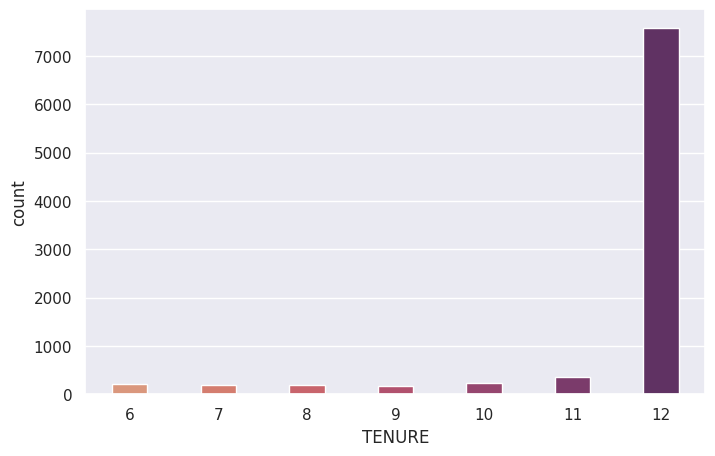

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x ='TENURE', data = data, width=0.4,palette="flare" )

In [ ]:
data['CREDIT_LIMIT'].value_counts()

3000.000000     784
1500.000000     722
1200.000000     621
1000.000000     614
2500.000000     612
               ... 
9200.000000       1
13550.000000      1
7227.272727       1
11250.000000      1
1833.333333       1
Name: CREDIT_LIMIT, Length: 205, dtype: int64

In [ ]:
limit=data['CREDIT_LIMIT'].value_counts().rename_axis('unique_values').to_frame('counts')
limit

,counts
unique_values,
3000.000000,784
1500.000000,722
1200.000000,621
1000.000000,614
2500.000000,612
...,...
9200.000000,1
13550.000000,1
7227.272727,1


In [ ]:
limit['values']= limit.index
limit

,counts,values
unique_values,,
3000.000000,784,3000.000000
1500.000000,722,1500.000000
1200.000000,621,1200.000000
1000.000000,614,1000.000000
2500.000000,612,2500.000000
...,...,...
9200.000000,1,9200.000000
13550.000000,1,13550.000000
7227.272727,1,7227.272727


<Axes: xlabel='CREDIT_LIMIT', ylabel='Count'>

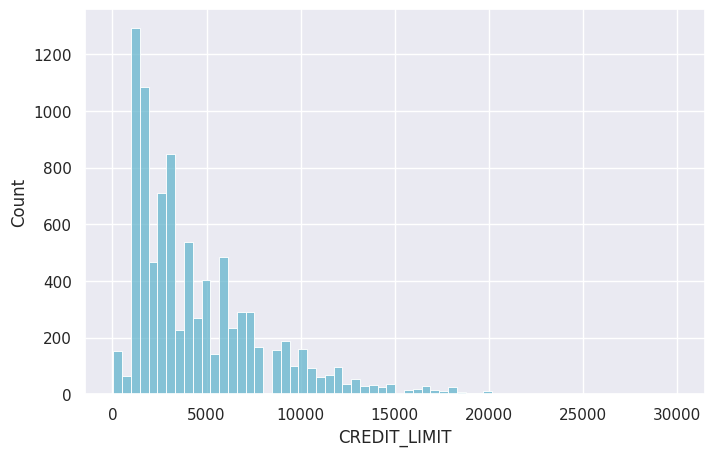

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data=data, x="CREDIT_LIMIT", color="c")

<Axes: xlabel='CREDIT_LIMIT', ylabel='Count'>

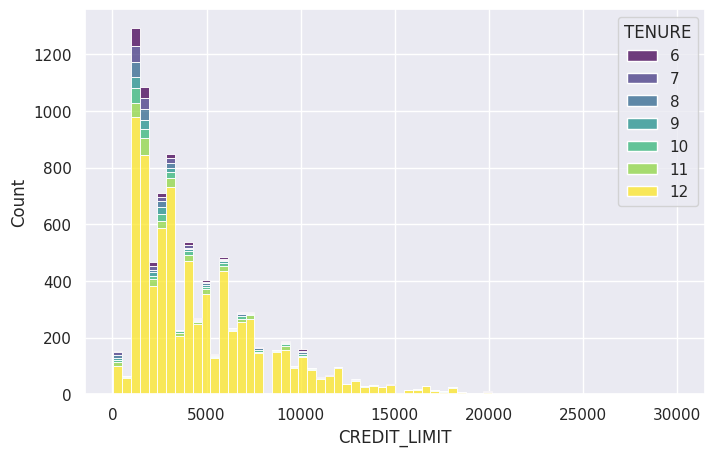

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data=data, x="CREDIT_LIMIT", hue='TENURE',multiple="stack",palette='viridis' )

Notes: It's clear that Most cards are with long tenure. Also, short tenures appear more with cards of Low limits

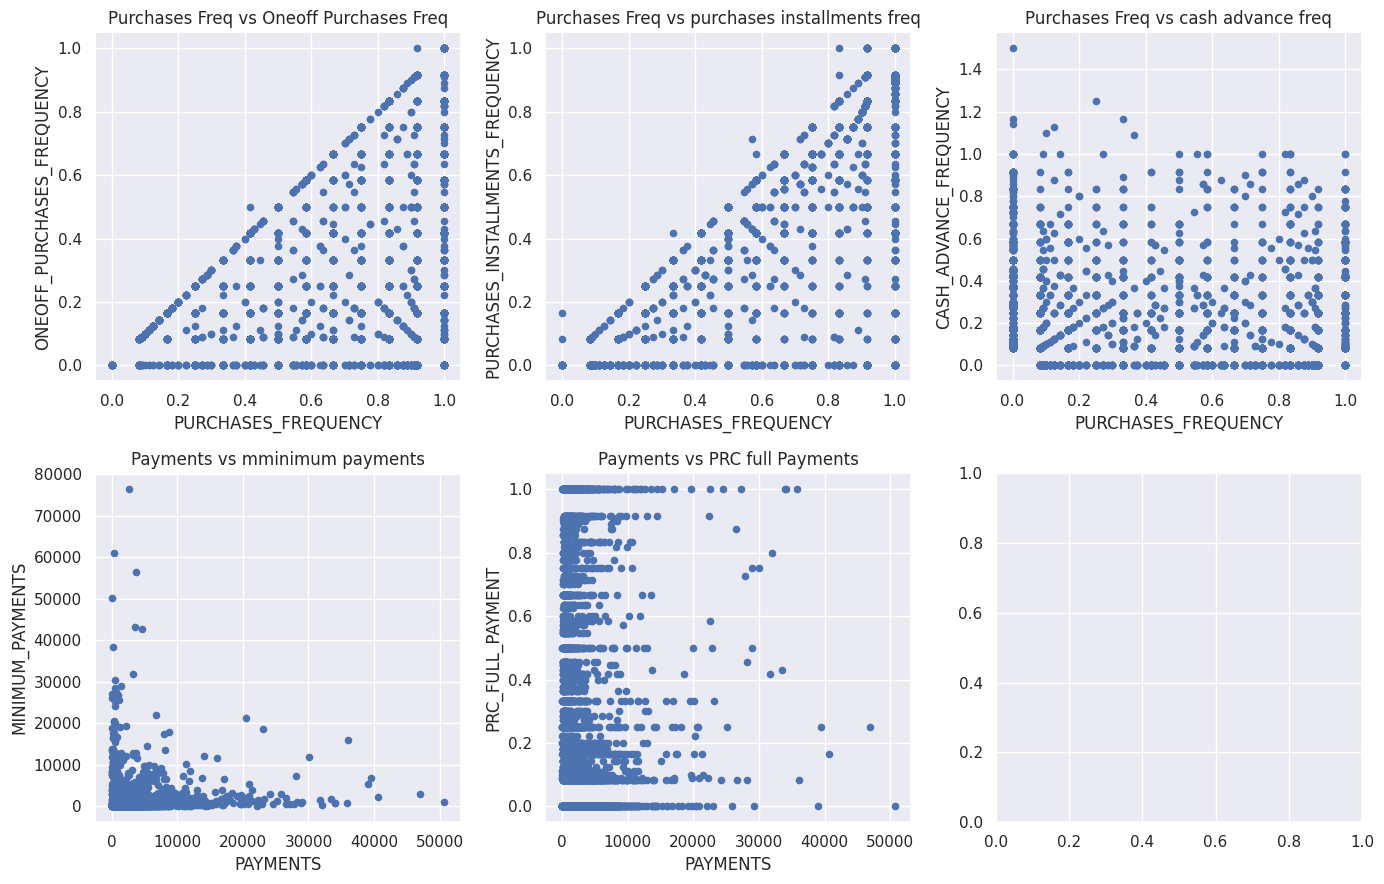

In [ ]:
sns.set(rc = {'figure.figsize':(14,9)})
col=['PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','PAYMENTS']
fig, axes = plt.subplots(nrows=2, ncols=3)

data.plot(x=col[0], y=col[1], kind='scatter',title=('Purchases Freq vs Oneoff Purchases Freq'),ax=axes[0,0])
data.plot(x=col[0], y=col[2], kind='scatter',title=('Purchases Freq vs purchases installments freq'),ax=axes[0,1])
data.plot(x=col[0], y=col[3], kind='scatter',title=('Purchases Freq vs cash advance freq'),ax=axes[0,2])
data.plot(x=col[6], y=col[4], kind='scatter',title=('Payments vs mminimum payments'),ax=axes[1,0])
data.plot(x=col[6], y=col[5], kind='scatter',title=('Payments vs PRC full Payments'),ax=axes[1,1])
plt.tight_layout()
plt.show()




## Dropping Feature

In [3]:
# Numerical Features Only
dataa=data.drop('CUST_ID', axis=1).copy()
dataa

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


## Checking correlations

<Axes: >

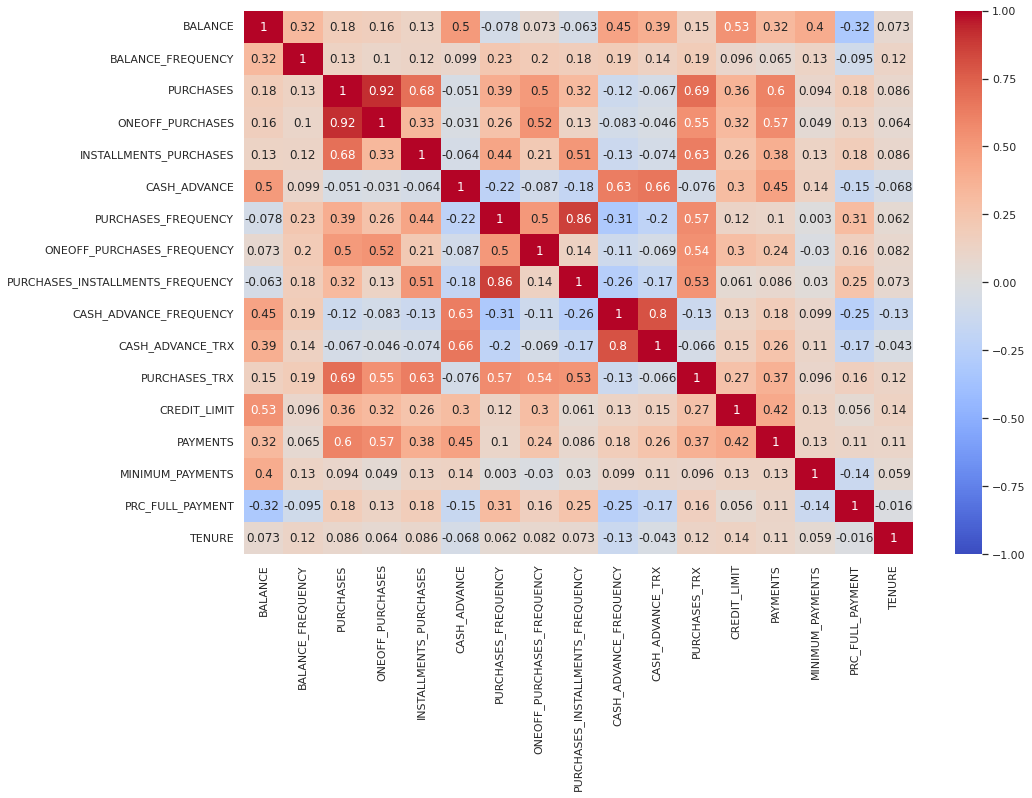

In [ ]:
sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(dataa.corr(),cmap="coolwarm",vmax=1,vmin=-1,center=0,annot=True)

Notes: Strong Correlations

*   PURCHASES	& ONEOFF_PURCHASES by **92%**
*   PURCHASES_FREQUENCY & PURCHASES_INSTALLMENTS_FREQUENCY by **86%**
*   CASH_ADVANCE_FREQUENCY & CASH_ADVANCE_TRX by **80%**


## **Checking the Normal distribution & Outliers**

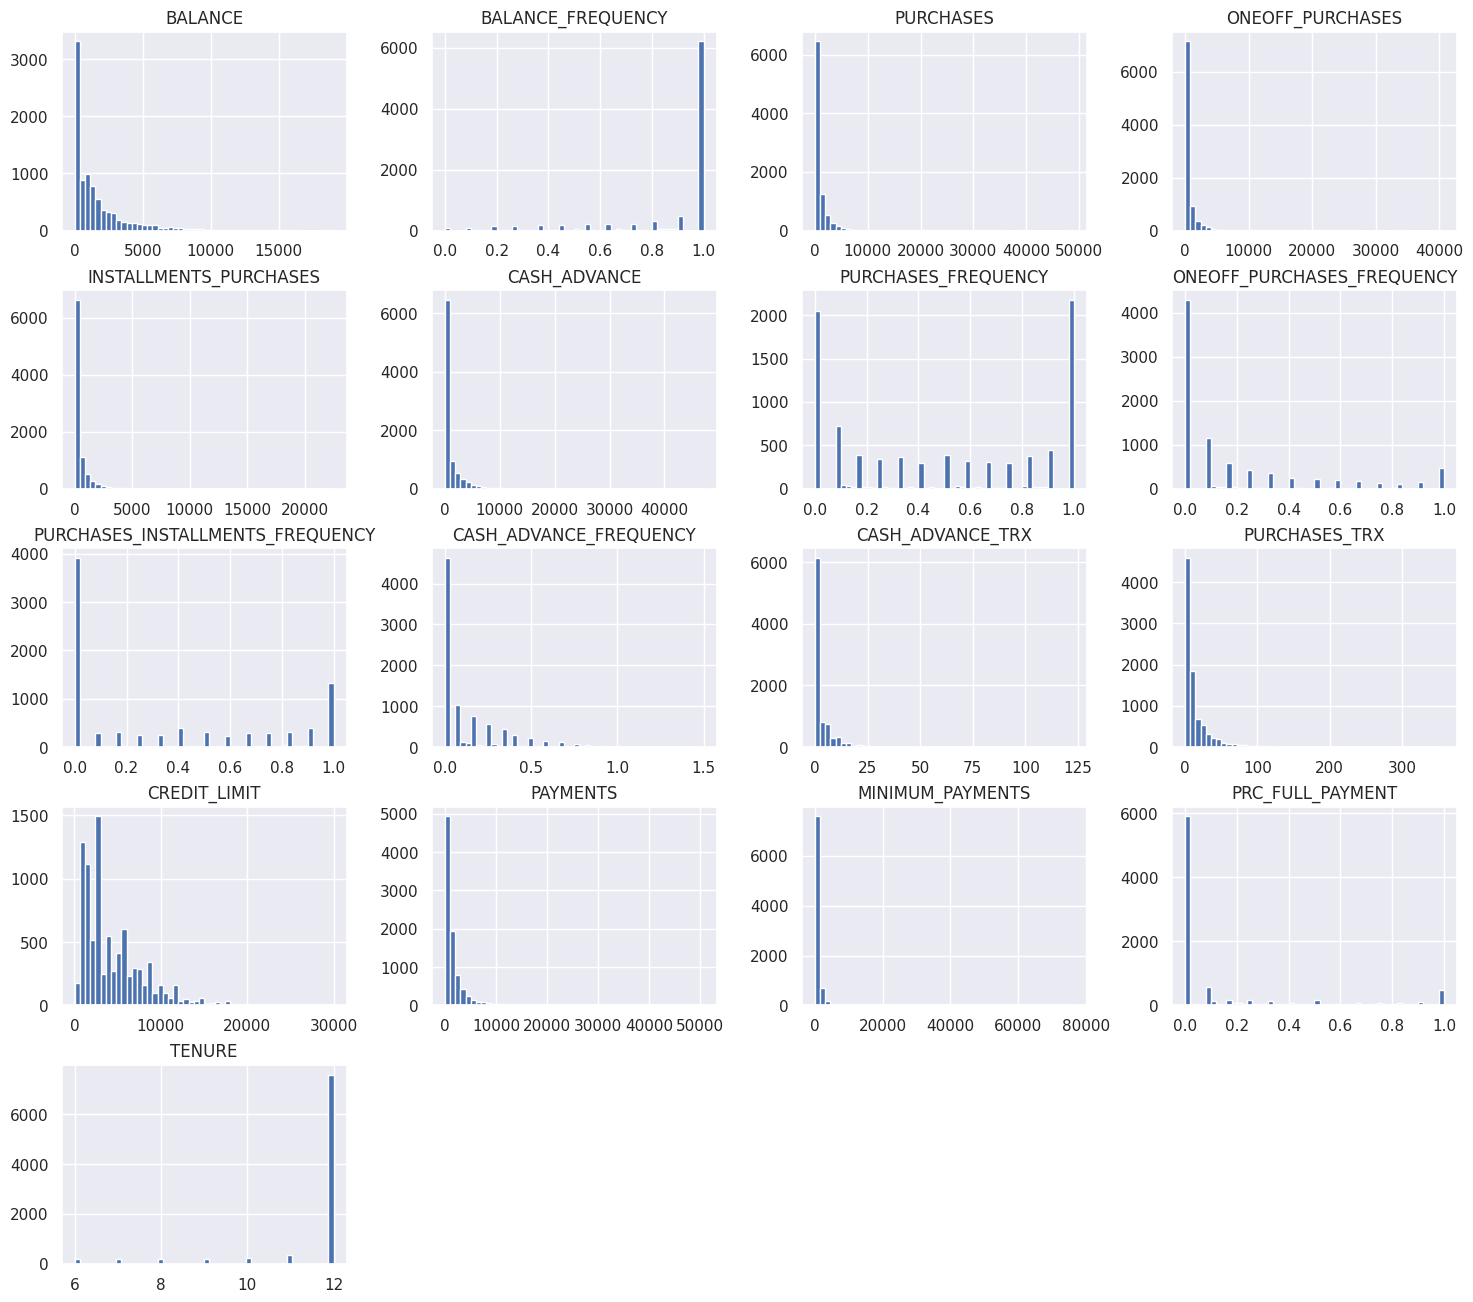

In [ ]:
sns.set(rc = {'figure.figsize':(18,16)})
dataa.hist(bins=50)
plt.show()

Notes:

*   10 columns are skewed to the right
*   2 columns are skewed to the left
*   4 columns are in U distribution/bimodal/two peaks values



(array([1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(1, 0, 'BALANCE'),
  Text(2, 0, 'PURCHASES'),
  Text(3, 0, 'ONEOFF_PURCHASES'),
  Text(4, 0, 'INSTALLMENTS_PURCHASES'),
  Text(5, 0, 'CASH_ADVANCE'),
  Text(6, 0, 'CREDIT_LIMIT'),
  Text(7, 0, 'PAYMENTS'),
  Text(8, 0, 'MINIMUM_PAYMENTS')])

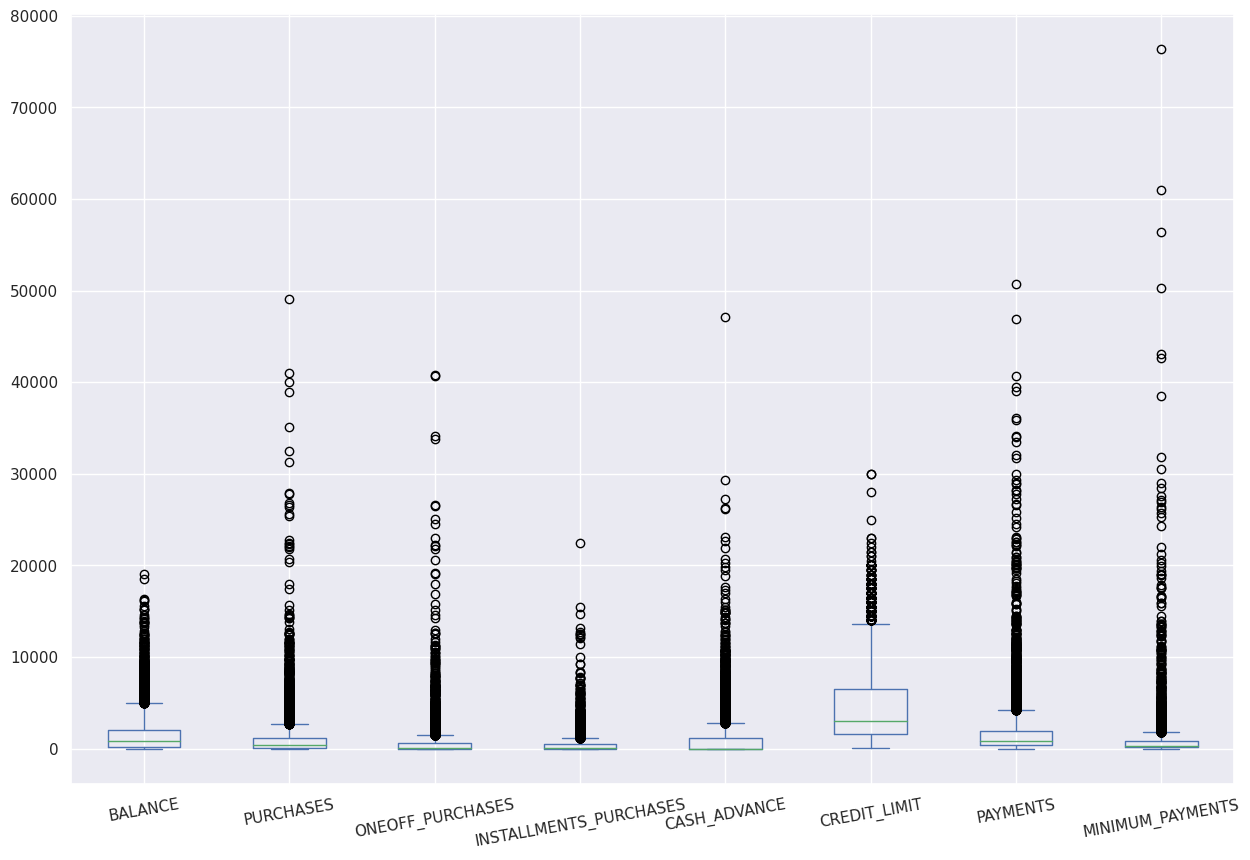

In [ ]:
sns.set(rc = {'figure.figsize':(15,10)})
dataa.drop(data01+dataint,axis=1).plot(kind = 'box')
plt.xticks(rotation=10)

<Axes: >

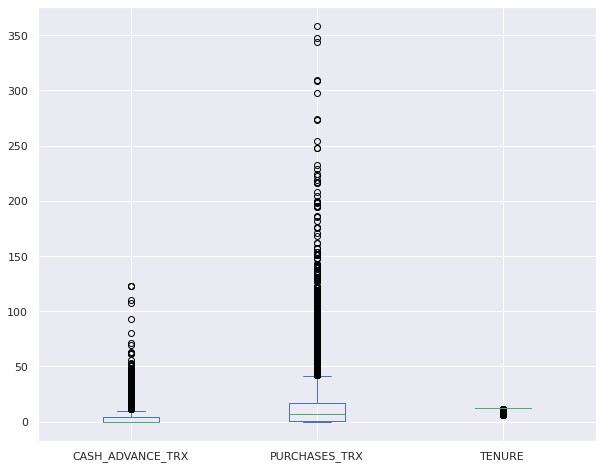

In [ ]:
sns.set(rc = {'figure.figsize':(10,8)})
dataint.plot(kind = 'box')

(array([1, 2, 3, 4, 5, 6]),
 [Text(1, 0, 'BALANCE_FREQUENCY'),
  Text(2, 0, 'PURCHASES_FREQUENCY'),
  Text(3, 0, 'ONEOFF_PURCHASES_FREQUENCY'),
  Text(4, 0, 'PURCHASES_INSTALLMENTS_FREQUENCY'),
  Text(5, 0, 'CASH_ADVANCE_FREQUENCY'),
  Text(6, 0, 'PRC_FULL_PAYMENT')])

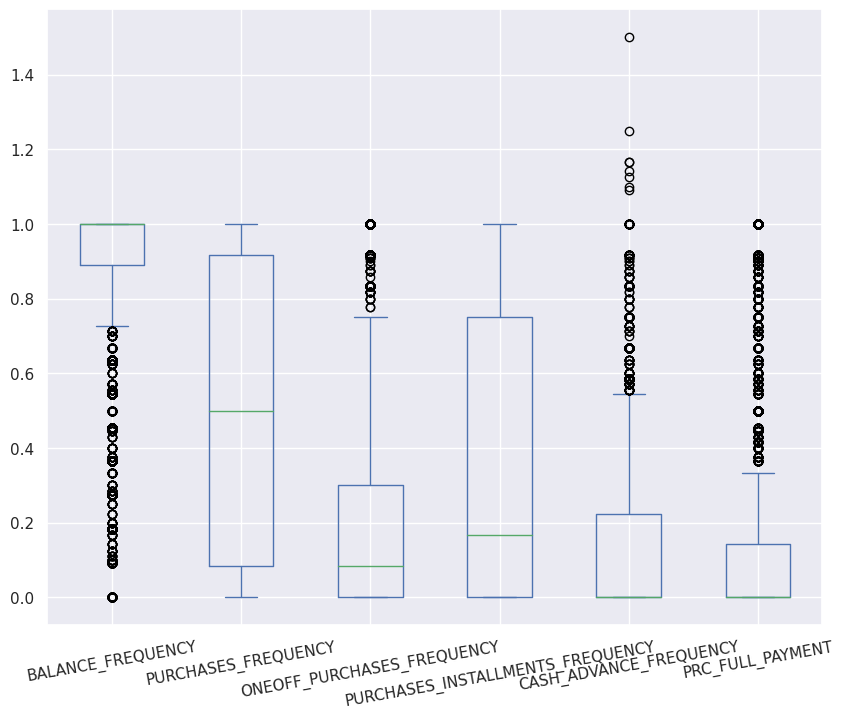

In [ ]:
# Plotting The columns of frequencies 
sns.set(rc = {'figure.figsize':(10,8)})
data01.plot(kind = 'box')
plt.xticks(rotation=10)

## Checking NaN values

In [ ]:
dataa.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

**Missing Values**
*   MINIMUM_PAYMENT missing 313 values, 3.5%
*   CREDIT-LIMIT missing 1 value, <0.1%


In [ ]:
(dataa == 0).sum()

BALANCE                               80
BALANCE_FREQUENCY                     80
PURCHASES                           2044
ONEOFF_PURCHASES                    4302
INSTALLMENTS_PURCHASES              3916
CASH_ADVANCE                        4628
PURCHASES_FREQUENCY                 2043
ONEOFF_PURCHASES_FREQUENCY          4302
PURCHASES_INSTALLMENTS_FREQUENCY    3915
CASH_ADVANCE_FREQUENCY              4628
CASH_ADVANCE_TRX                    4628
PURCHASES_TRX                       2044
CREDIT_LIMIT                           0
PAYMENTS                             240
MINIMUM_PAYMENTS                       0
PRC_FULL_PAYMENT                    5903
TENURE                                 0
dtype: int64

In [ ]:
dataa.duplicated(keep='first').sum()

0

# **2. Pre-Processing**

## **Treating Missing Values:**
### using Nearest Neighbors Imputations (KNNImputer)

In [4]:
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=2)
nantreat=impute_knn.fit_transform(dataa)
nantreat

array([[4.09007490e+01, 8.18182000e-01, 9.54000000e+01, ...,
        1.39509787e+02, 0.00000000e+00, 1.20000000e+01],
       [3.20246742e+03, 9.09091000e-01, 0.00000000e+00, ...,
        1.07234022e+03, 2.22222000e-01, 1.20000000e+01],
       [2.49514886e+03, 1.00000000e+00, 7.73170000e+02, ...,
        6.27284787e+02, 0.00000000e+00, 1.20000000e+01],
       ...,
       [2.33986730e+01, 8.33333000e-01, 1.44400000e+02, ...,
        8.24183690e+01, 2.50000000e-01, 6.00000000e+00],
       [1.34575640e+01, 8.33333000e-01, 0.00000000e+00, ...,
        5.57556280e+01, 2.50000000e-01, 6.00000000e+00],
       [3.72708075e+02, 6.66667000e-01, 1.09325000e+03, ...,
        8.82889560e+01, 0.00000000e+00, 6.00000000e+00]])

In [5]:
dataa= pd.DataFrame(nantreat)
dataa.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
dtype: int64

## Outliers Detection

In [6]:
max_thresold = dataa.quantile(0.99)
max_thresold

0      9338.804814
1         1.000000
2      8977.290000
3      6689.898200
4      3886.240500
5      9588.163357
6         1.000000
7         1.000000
8         1.000000
9         0.833333
10       29.000000
11      116.510000
12    17000.000000
13    13608.715541
14     8759.014893
15        1.000000
16       12.000000
Name: 0.99, dtype: float64

In [7]:
min_thresold = dataa.quantile(0.01)
min_thresold

0       0.065101
1       0.090909
2       0.000000
3       0.000000
4       0.000000
5       0.000000
6       0.000000
7       0.000000
8       0.000000
9       0.000000
10      0.000000
11      0.000000
12    500.000000
13      0.000000
14     18.406936
15      0.000000
16      6.000000
Name: 0.01, dtype: float64

In [8]:
outliers=(dataa[dataa.columns ]< min_thresold) | (dataa[dataa.columns] > max_thresold)
outliers.sum()

0     180
1      80
2      90
3      90
4      90
5      90
6       0
7       0
8       0
9      77
10     89
11     90
12    110
13     90
14    180
15      0
16      0
dtype: int64

In [ ]:
sum(outliers.sum())

1256

In [9]:
# Treating Outliers by Capping them
def cap_data(dataa):
    for col in dataa.columns:
        print("capping the ",col)
        percentiles = dataa[col].quantile([0.01,0.99]).values
        dataa[col][dataa[col] <= percentiles[0]] = percentiles[0]
        dataa[col][dataa[col] >= percentiles[1]] = percentiles[1]
    return dataa

dataa_cleaned=cap_data(dataa)

capping the  0
capping the  1
capping the  2
capping the  3
capping the  4
capping the  5
capping the  6
capping the  7
capping the  8
capping the  9
capping the  10
capping the  11
capping the  12
capping the  13
capping the  14
capping the  15
capping the  16


In [ ]:
dataa_cleaned

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,374.488119,0.000000,12.0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,325.594462,48.886365,0.500000,6.0
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,275.861322,173.938873,0.000000,6.0
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0.0,5.0,1000.0,81.270775,82.418369,0.250000,6.0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2.0,0.0,500.0,52.549959,55.755628,0.250000,6.0


In [ ]:
outliers=(dataa_cleaned[dataa_cleaned.columns ]< min_thresold) | (dataa_cleaned[dataa_cleaned.columns] > max_thresold)
outliers.sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
dtype: int64

## **Scaling & Normalizing:**

### **Quantile Transformer Scaler**
  Outlier Removal, Scaling Data, Conversion into the normal distribution.


In [11]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer()

In [13]:
dataprep = scaler.fit_transform(dataa_cleaned.values)
dataprep

array([[0.14174945, 0.21421421, 0.30655709, ..., 0.17200094, 0.        ,
        1.        ],
       [0.85078773, 0.28278278, 0.        , ..., 0.81172689, 0.79079079,
        1.        ],
       [0.79296464, 1.        , 0.6683165 , ..., 0.68904208, 0.        ,
        1.        ],
       ...,
       [0.09946972, 0.23273273, 0.346405  , ..., 0.06878933, 0.8008008 ,
        0.        ],
       [0.065961  , 0.23273273, 0.        , ..., 0.03727757, 0.8008008 ,
        0.        ],
       [0.3676848 , 0.16166166, 0.74640493, ..., 0.08155798, 0.        ,
        0.        ]])

In [14]:
dataprep= pd.DataFrame(dataprep)
dataprep

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.141749,0.214214,0.306557,0.000000,0.506481,0.000000,0.341842,0.000000,0.452953,0.000000,0.000000,0.323824,0.058559,0.117443,0.172001,0.000000,1.0
1,0.850788,0.282783,0.000000,0.000000,0.000000,0.973717,0.000000,0.000000,0.000000,0.783283,0.755756,0.000000,0.789289,0.907365,0.811727,0.790791,1.0
2,0.792965,1.000000,0.668316,0.790743,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.650150,0.821822,0.398775,0.689042,0.000000,1.0
3,0.694316,0.148148,0.811500,0.891709,0.000000,0.592346,0.266266,0.542543,0.000000,0.574074,0.566567,0.265766,0.821822,0.000000,0.553306,0.000000,1.0
4,0.484694,1.000000,0.233530,0.485891,0.000000,0.000000,0.266266,0.542543,0.000000,0.000000,0.000000,0.265766,0.128629,0.425614,0.444608,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.113738,1.000000,0.455849,0.000000,0.655347,0.000000,1.000000,0.000000,0.780781,0.000000,0.000000,0.461461,0.058559,0.208945,0.031097,0.865866,0.0
8946,0.085751,1.000000,0.461962,0.000000,0.661161,0.000000,1.000000,0.000000,0.780781,0.000000,0.000000,0.461461,0.058559,0.167482,0.285375,0.000000,0.0
8947,0.099470,0.232733,0.346405,0.000000,0.549066,0.000000,0.678178,0.000000,0.704204,0.000000,0.000000,0.426927,0.058559,0.046536,0.068789,0.800801,0.0
8948,0.065961,0.232733,0.000000,0.000000,0.000000,0.523835,0.000000,0.000000,0.000000,0.699700,0.650651,0.000000,0.000000,0.035022,0.037278,0.800801,0.0


<Axes: >

<Figure size 1500x1000 with 0 Axes>

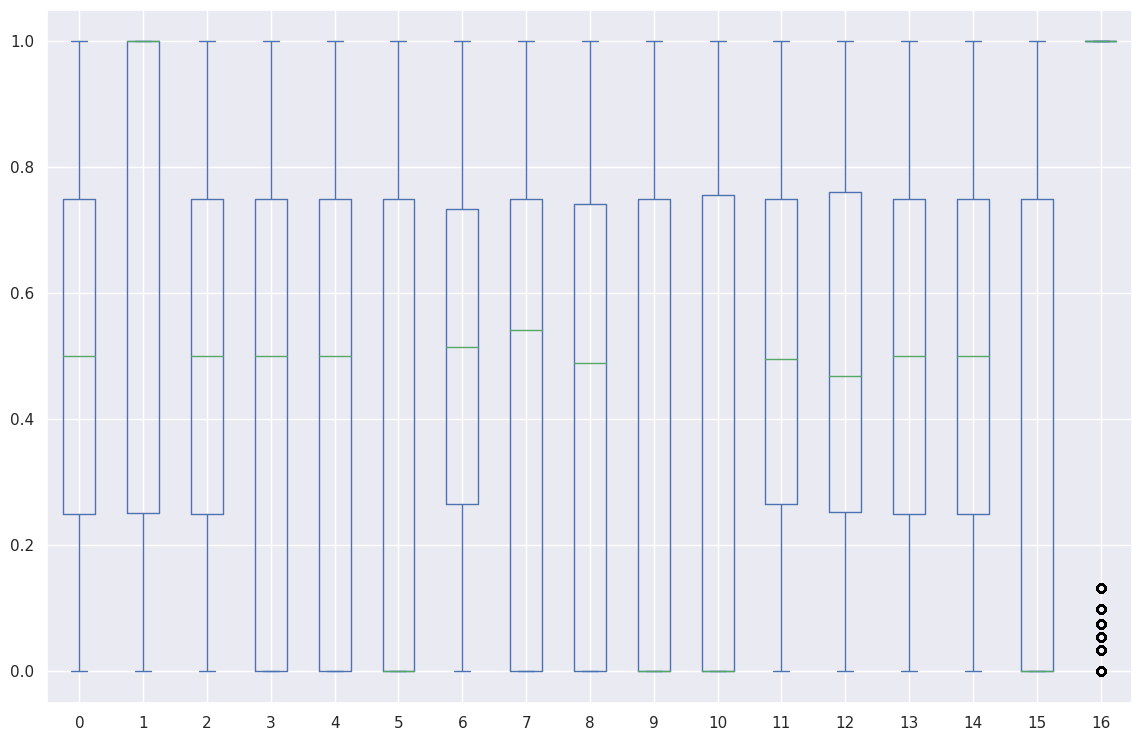

In [ ]:
plt.figure(figsize=(15,10))
dataprep.plot(kind = 'box')

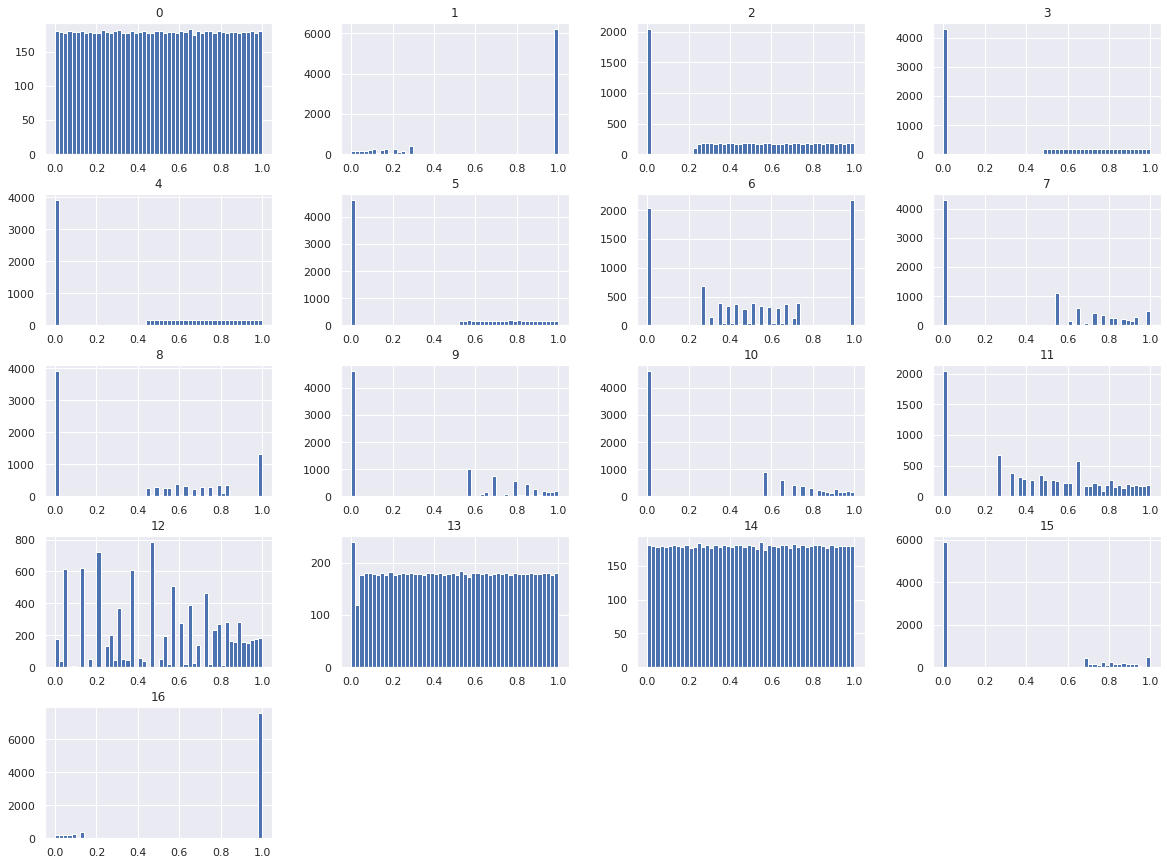

In [ ]:
dataprep.hist(bins=50)
plt.figure(figsize=(15,10))
plt.show()

# **4. Data Clustering**

In [15]:
import warnings
warnings.filterwarnings("ignore")

## **Selecting the number of clusters**

### **Using Inertia score**

In [16]:
prepdata=np.array(dataprep)

In [22]:
from sklearn.cluster import KMeans

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(prepdata)
                for k in range(1, 15)]
inertias = [model.inertia_ for model in kmeans_per_k]

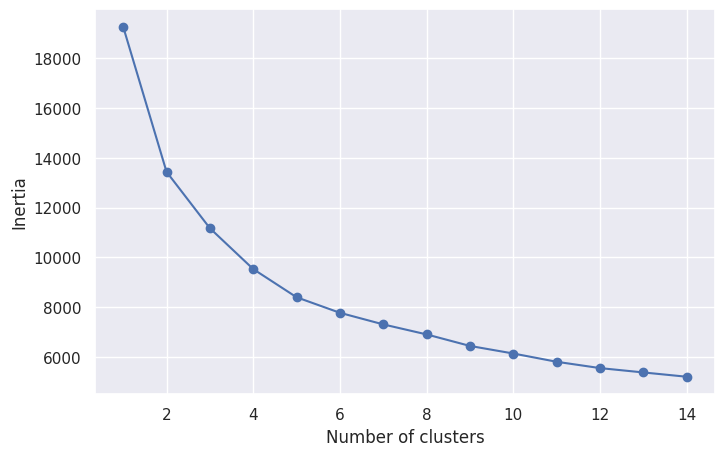

In [ ]:
dfk = pd.DataFrame({'Cluster':range(1,15), 'Score':inertias})

plt.figure(figsize=(8,5))
plt.plot(dfk['Cluster'], dfk['Score'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
     

### **Using Silhouette score**

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn import metrics

In [ ]:
silhouette_scores = [silhouette_score(prepdata, model.labels_)
                     for model in kmeans_per_k[1:]]

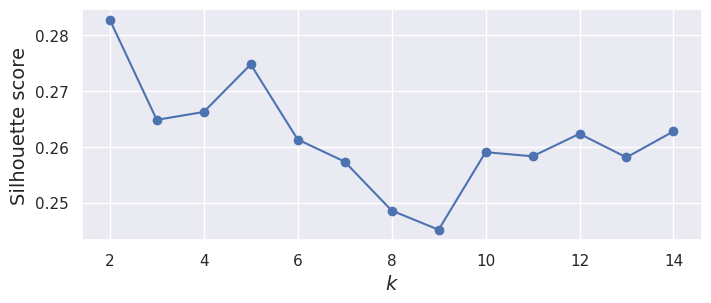

In [ ]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 15), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

In [ ]:
for i in range(2,11):
    kmeans_labels=KMeans(n_clusters=i,random_state=42).fit_predict(prepdata)
    print("Silhouette score for {} clusters k-means : {} ".format(i,metrics.silhouette_score(prepdata,kmeans_labels, metric='euclidean').round(3)))

Silhouette score for 2 clusters k-means : 0.283 
Silhouette score for 3 clusters k-means : 0.265 
Silhouette score for 4 clusters k-means : 0.266 
Silhouette score for 5 clusters k-means : 0.275 
Silhouette score for 6 clusters k-means : 0.261 
Silhouette score for 7 clusters k-means : 0.257 
Silhouette score for 8 clusters k-means : 0.249 
Silhouette score for 9 clusters k-means : 0.245 
Silhouette score for 10 clusters k-means : 0.259 


Note: The best number of clusters is **k=2,5**




### **Using  Silhouette diagram**

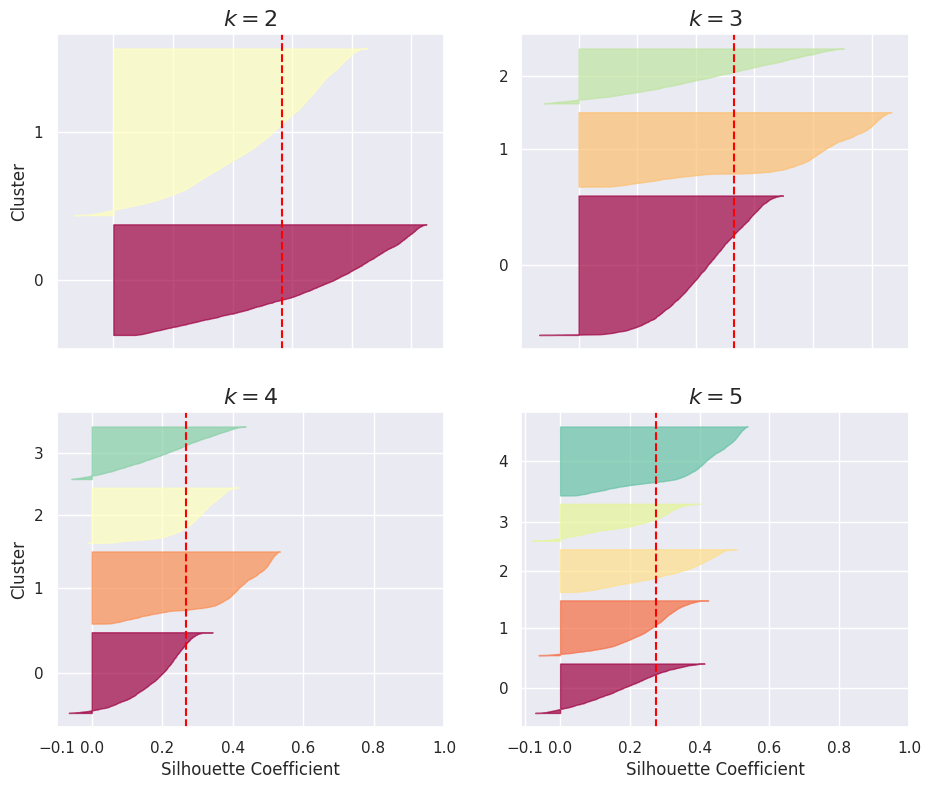

In [ ]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (2, 3, 4, 5):

    plt.subplot(2, 2,k-1)
    
    y_pred = kmeans_per_k[k -1].labels_
    silhouette_coefficients = silhouette_samples(prepdata, y_pred)

    padding = len(prepdata) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (2, 4):
        plt.ylabel("Cluster")
    
    if k in (4, 5):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

### **Using Bayesian Gaussian Mixture**


In [30]:
from sklearn.mixture import BayesianGaussianMixture

In [ ]:
for k in (2,3,5,6):
  bgm = BayesianGaussianMixture(n_components=k, n_init=10, random_state=42)
  bgm.fit(prepdata)
  weights= np.round(bgm.weights_, 2)
  print("BayesianGaussianMixture weights for",k," clusters = ",weights)

BayesianGaussianMixture weights for 2  clusters =  [0.52 0.48]
BayesianGaussianMixture weights for 3  clusters =  [0.52 0.26 0.23]
BayesianGaussianMixture weights for 5  clusters =  [0.2  0.23 0.2  0.26 0.12]
BayesianGaussianMixture weights for 6  clusters =  [0.2  0.23 0.2  0.17 0.12 0.09]


In [ ]:
for i in range(2,7):
    bgm = BayesianGaussianMixture(n_components=i, n_init=10, random_state=42).fit(prepdata)
    predictions= bgm.predict(dataprep)
    print("Silhouette score for {} clusters = {} ".format(i,metrics.silhouette_score(prepdata,predictions, metric='euclidean').round(3)))

Silhouette score for 2 clusters = 0.276 
Silhouette score for 3 clusters = 0.259 
Silhouette score for 4 clusters = 0.255 
Silhouette score for 5 clusters = 0.261 
Silhouette score for 6 clusters = 0.257 


## Setting PCA for Visualizing

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3).fit(prepdata)
pca

PCA(n_components=3)

In [18]:
print("data before dimensionality reduction:")
display(dataprep.head())

PC_data = pd.DataFrame(pca.transform(prepdata), columns=[f"PC {i}" for i in range(1,4)])
print("data after dimensionality reduction:")
display(PC_data.head())

data before dimensionality reduction:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.141749,0.214214,0.306557,0.000000,0.506481,0.000000,0.341842,0.000000,0.452953,0.000000,0.000000,0.323824,0.058559,0.117443,0.172001,0.000000,1.0
1,0.850788,0.282783,0.000000,0.000000,0.000000,0.973717,0.000000,0.000000,0.000000,0.783283,0.755756,0.000000,0.789289,0.907365,0.811727,0.790791,1.0
2,0.792965,1.000000,0.668316,0.790743,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.650150,0.821822,0.398775,0.689042,0.000000,1.0
3,0.694316,0.148148,0.811500,0.891709,0.000000,0.592346,0.266266,0.542543,0.000000,0.574074,0.566567,0.265766,0.821822,0.000000,0.553306,0.000000,1.0
4,0.484694,1.000000,0.233530,0.485891,0.000000,0.000000,0.266266,0.542543,0.000000,0.000000,0.000000,0.265766,0.128629,0.425614,0.444608,0.000000,1.0


data after dimensionality reduction:


,PC 1,PC 2,PC 3
0,-0.113626,-1.150263,0.105760
1,1.321087,-0.032967,0.095161
2,-0.518317,0.438632,-0.845076
3,0.460624,0.184189,-0.811457
4,0.097726,-0.375223,-0.605113


In [19]:
# Get relative explained variances
explained_var = pca.explained_variance_ratio_

for pc_i in range(explained_var.shape[0]):
  print("explained variance - principle component {}: {}".format(pc_i + 1, explained_var[pc_i]))
print()

print("Total Explained Variance: %{:.2f}".format(explained_var.sum() * 100))


explained variance - principle component 1: 0.3854407257566304
explained variance - principle component 2: 0.20725056891251808
explained variance - principle component 3: 0.11667769835245693

Total Explained Variance: %70.94


In [20]:
pca = PCA(n_components=3).fit_transform(prepdata)

In [21]:
#@title The best number of PC component to reduce the data:
pcaa= PCA(n_components=0.95)
data_reduced= pcaa.fit_transform(prepdata)
pcaa.n_components_

8

## Clustering Methods

### **K-means** (Centroid-based model)

In [23]:
kmeans_labels=KMeans(n_clusters=5,random_state=42).fit_predict(prepdata)

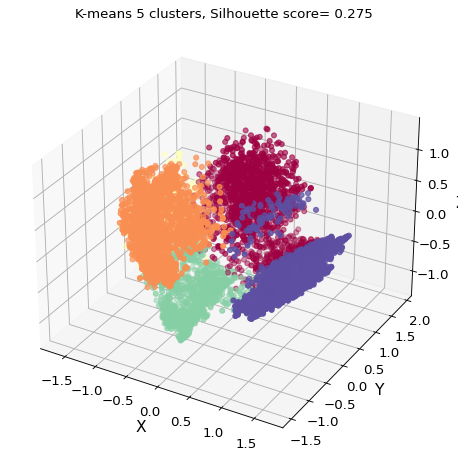

In [25]:
fig = plt.figure(figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")
ax.scatter3D(pca.T[0],pca.T[1],pca.T[2],c=kmeans_labels,cmap='Spectral')
plt.title('K-means 5 clusters, Silhouette score= 0.275')
xLabel = ax.set_xlabel('X')
yLabel = ax.set_ylabel('Y')
zLabel = ax.set_zlabel('Z')

### **DBSCAN** (Density-based model)

In [26]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [ ]:
results=pd.DataFrame(columns=['Eps','Min_Samples','Number of Cluster','Silhouette Score'])
for i in range(1,12):
  for j in range(1,12):
      dbscan_cluster = DBSCAN(eps=i*0.1, min_samples=j)
      clusters=dbscan_cluster.fit_predict(prepdata)
      if len(np.unique(clusters))>2:
          results=results.append({'Eps':i*0.1,
                        'Min_Samples':j,
                        'Number of Cluster':len(np.unique(clusters)),
                        'Silhouette Score':metrics.silhouette_score(prepdata,clusters)}, ignore_index=True)

In [ ]:
results.sort_values('Silhouette Score',ascending=False)[:5]

,Eps,Min_Samples,Number of Cluster,Silhouette Score
57,0.6,3.0,60.0,0.295513
58,0.6,4.0,57.0,0.295369
59,0.6,5.0,55.0,0.289666
56,0.6,2.0,74.0,0.287757
61,0.6,7.0,53.0,0.282674


In [ ]:
db = DBSCAN(eps=0.6, min_samples=5).fit(prepdata)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 54
Estimated number of noise points: 188


In [27]:
dbscan_cluster = DBSCAN(eps=0.6, min_samples=3)
db_clusters=dbscan_cluster.fit_predict(prepdata)

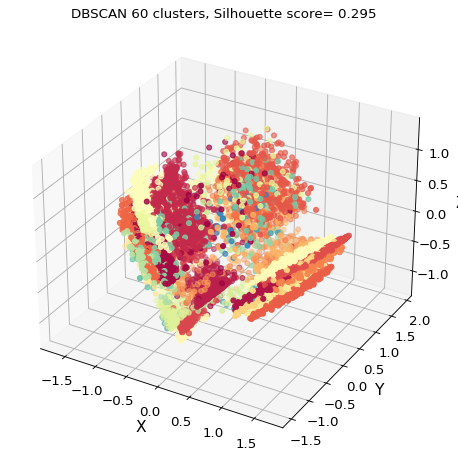

In [29]:
fig = plt.figure(figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")
ax.scatter3D(pca.T[0],pca.T[1],pca.T[2],c=db_clusters,cmap='Spectral')

ax.set_title('DBSCAN 60 clusters, Silhouette score= 0.295')
xLabel = ax.set_xlabel('X')
yLabel = ax.set_ylabel('Y')
zLabel = ax.set_zlabel('Z')

### **BGM** (Distribution-based model)

In [31]:
bgm = BayesianGaussianMixture(n_components=2, n_init=10, random_state=42).fit(prepdata)
predictions= bgm.predict(dataprep)

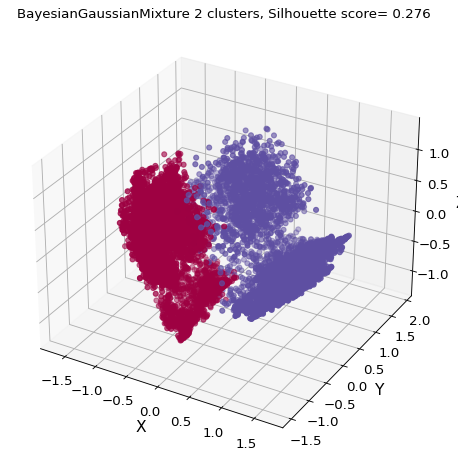

In [34]:
fig = plt.figure(figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")
ax.scatter3D(pca.T[0],pca.T[1],pca.T[2],c=predictions,cmap='Spectral')

plt.title('BayesianGaussianMixture 2 clusters, Silhouette score= 0.276')
xLabel = ax.set_xlabel('X')
yLabel = ax.set_ylabel('Y')
zLabel = ax.set_zlabel('Z')

# **5. Interpreting Clusters**

In [35]:
data['Clusters']=list(kmeans_labels)

In [36]:
data.set_index('Clusters')
grouped=data.groupby(by='Clusters').mean().round(2)
toplot=grouped.iloc[:,[0,1,2,6,3,7,4,8,5,9,12,13,14,15,16]]
toplot

,BALANCE,BALANCE_FREQUENCY,PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES,ONEOFF_PURCHASES_FREQUENCY,INSTALLMENTS_PURCHASES,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Clusters,,,,,,,,,,,,,,,
0,2971.21,0.97,1435.48,0.68,884.05,0.32,551.77,0.49,2299.27,0.30,5561.02,2723.15,1370.55,0.05,11.53
1,343.85,0.78,513.52,0.70,7.08,0.01,507.38,0.67,8.94,0.00,3086.69,717.46,574.68,0.32,11.49
2,1413.70,0.97,2932.82,0.88,1813.63,0.53,1119.22,0.70,2.50,0.00,6216.53,2683.78,794.47,0.27,11.88
3,688.17,0.75,753.89,0.34,733.54,0.32,20.42,0.03,19.98,0.01,4195.50,1067.19,448.21,0.12,11.50
4,2090.00,0.89,18.53,0.02,14.89,0.01,3.68,0.01,1923.82,0.27,3940.02,1597.98,977.94,0.04,11.31


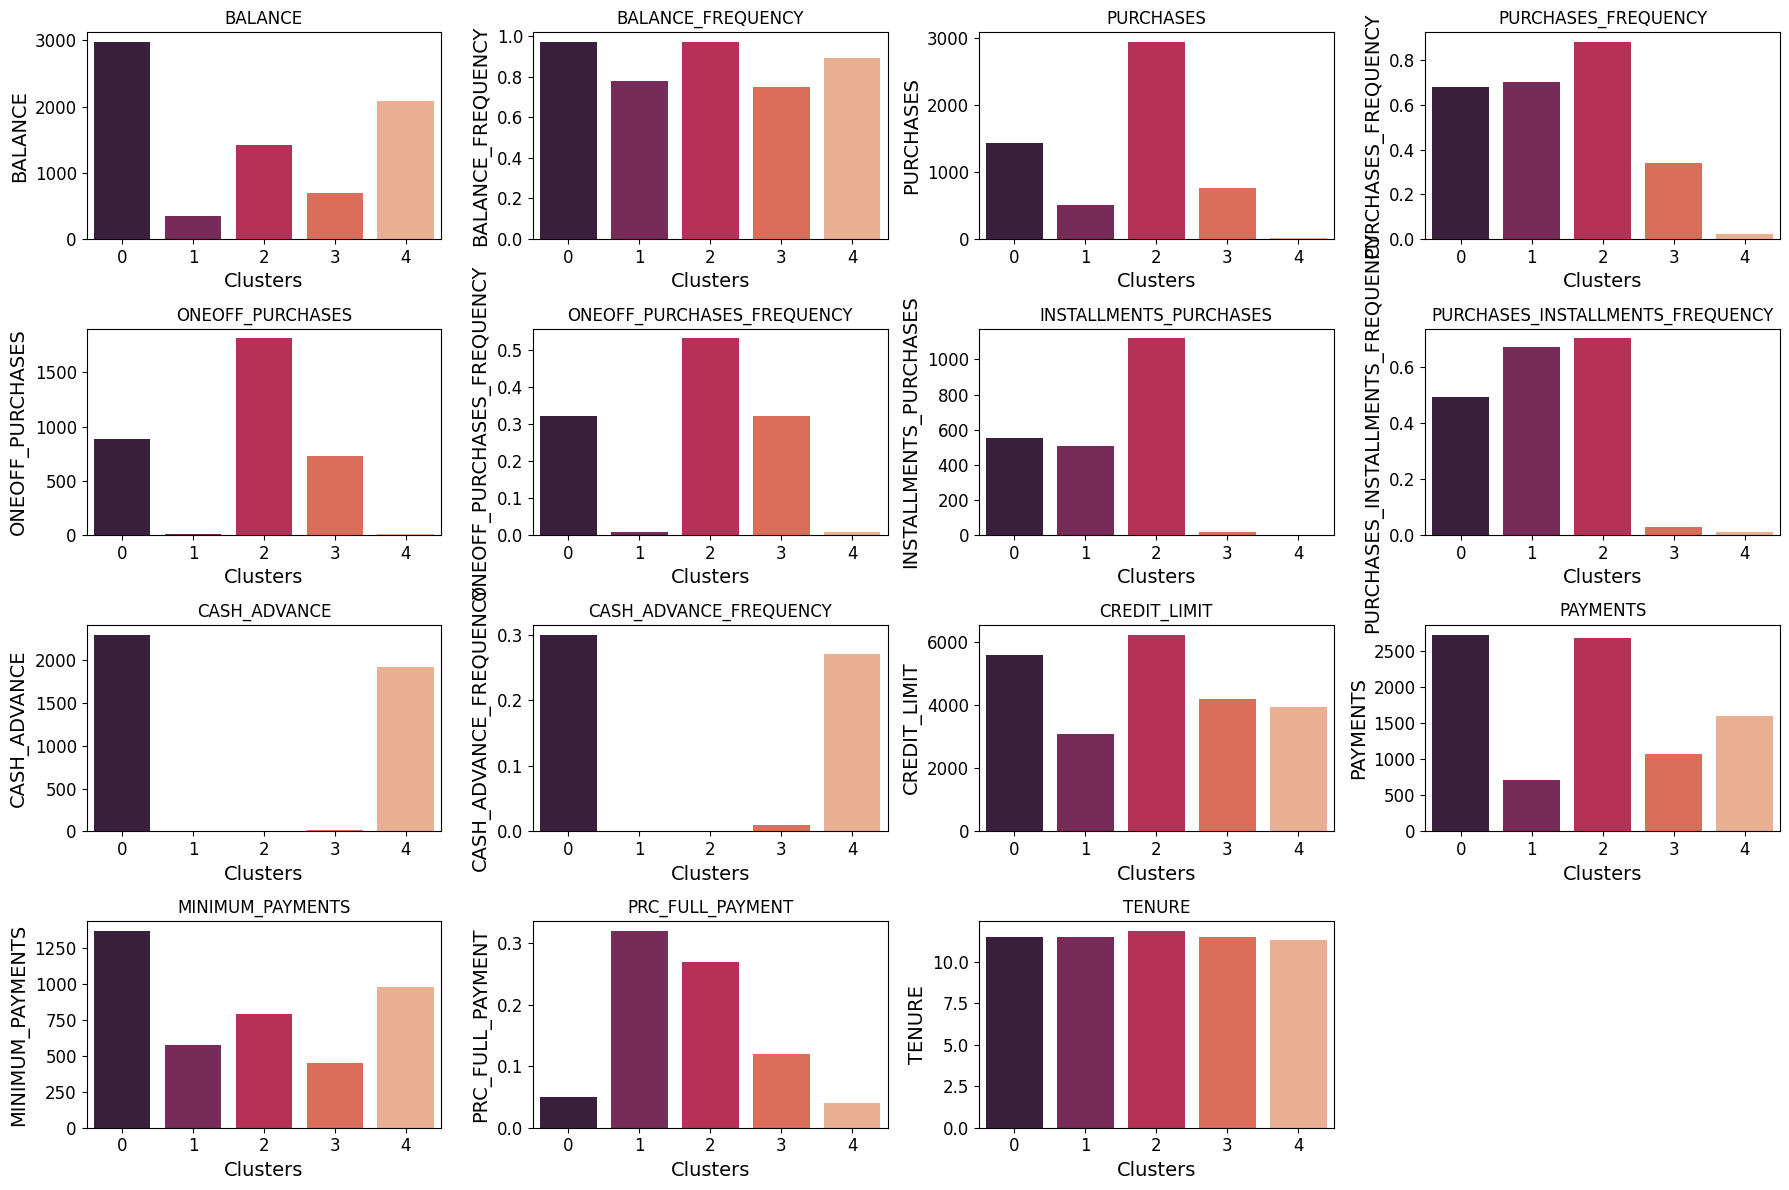

In [43]:
plt.figure(figsize=(18,12))
for i,j in enumerate(toplot):
    plt.subplot(4,4,i+1)
    sns.barplot(x=toplot.index, y=toplot[j], palette= 'rocket')
    plt.title(j)
plt.tight_layout()
plt.show()

***Interpretation:***<br>
Looking at the graphs, it's clear the variance that each cluster has, which makes hints of customers segments that we have at the criterions of:

*   Balance & How frequently the Balance is updated,
*   Purchases, Maximimum Purchases, Installments Purchases, Advanced Cash, the average amounts of purchases done frequently,
*   Payments & minimum and rate of full payments,
*   Credit card Limit.


